In [2]:
# CNN to analyze cifar10 dataset and classify the given image into on of the 10 classes of images.
#image recognition from 10 different types.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np

In [4]:
# load cifar10 data for image recognition from keras datasets
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 621s 4us/step


In [5]:
# display the shape of data
print('shape of training data ', x_train.shape)
print('Shape of testing data=', x_test.shape)
print("No. of Training samples=", x_train.shape[0])
print('No. of Testing samples=', x_test.shape[0])

shape of training data  (50000, 32, 32, 3)
Shape of testing data= (10000, 32, 32, 3)
No. of Training samples= 50000
No. of Testing samples= 10000


In [6]:
# display the values of 0th image array.
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [7]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test/ 255.0

In [8]:
#display again after normalization
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [9]:
#display a sample train image array and label
arr= y_train[0] # take Oth image
print(arr)

[6]


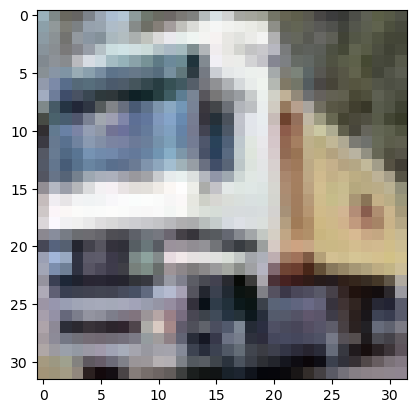

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

In [11]:
#to display first 10 images
#take the cl ass names in a 1ist
class_names = ['airplane', 'automobile', 'bird', 'cat' , 'deer', 'dog', 'frog' , 'horse', 'ship', "truck"]

In [12]:
plt.figure(figsize=(10 ,10))
# 10x10 inches -> width and height of the plot

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

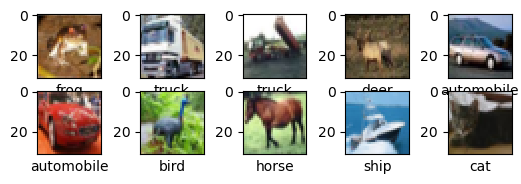

In [13]:
for i in range(10):
    plt.subplot (5, 5,i+1)
    plt.xticks([]) # allot space on X axis for names
    plt.imshow(x_train[i]) # display the image
    plt.xlabel(class_names[y_train[i][0]]) # display name on X axis

In [14]:
# convert labels into categorical values
from tensorflow. keras import utils # there are 10 classes
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [18]:
# build our CNN model
model = Sequential(
    [
    Dense(64, input_shape= (32, 32, 3)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ]
)

In [26]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics= ['accuracy'],)

In [23]:
#train the model
history=model.fit(x_train, y_train, 
                  batch_size=32, # no, of samples.
                  epochs=10,
                  verbose=1,
                  # 0 = silent, 1 = progress bar, 2 = one line per epoch.
                  validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 326s 206ms/step - accuracy: 0.3360 - loss: 1.7861 - val_accuracy: 0.5469 - val_loss: 1.2576
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 332s 213ms/step - accuracy: 0.5872 - loss: 1.1584 - val_accuracy: 0.6767 - val_loss: 0.9248
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 344s 220ms/step - accuracy: 0.6751 - loss: 0.9272 - val_accuracy: 0.7105 - val_loss: 0.8270
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 334s 214ms/step - accuracy: 0.7179 - loss: 0.8066 - val_accuracy: 0.7344 - val_loss: 0.7650
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 344s 220ms/step - accuracy: 0.7437 - loss: 0.7303 - val_accuracy: 0.7493 - val_loss: 0.7329
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 663s 424ms/step - accuracy: 0.7683 - loss: 0.6609 - val_accuracy: 0.7613 - val_loss: 0.7042
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 916s 586ms/step - accuracy: 0.7903 - loss: 0.6009 - val_accuracy: 0.7709 - val_loss: 0.6774
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1002s 641ms/step - a

In [27]:
# evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 230ms/step - accuracy: 0.7855 - loss: 0.6360
0.65627521276474 0.7781000137329102


In [28]:
# make prediction with 1st test data
arr=model.predict([x_train[1].reshape(1, 32,32,3)])
print(arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.3343822e-04 6.3413044e-04 4.1497469e-06 2.0174329e-07 2.7830278e-09
  1.0827390e-08 6.6329684e-09 4.6740411e-06 2.7134758e-04 9.9885201e-01]]


In [29]:
label = np.argmax(arr)
print(label)

9


In [30]:
#9